In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data and turn project path into a string
path = r'/Users/jerrysiphavong/Desktop/12-2024 Instacart Basket Analysis'

In [3]:
# Import customer data
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_merge.pkl'))

# Create a histogram of the "order_hour_of_day" column

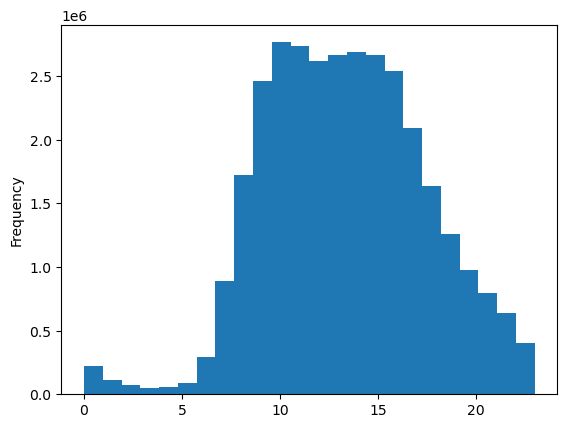

In [5]:
hist = df_merge['order_hour_of_day'].plot.hist(bins = 24)

# We're looking at orders throughout the day based on which hour of the day. The histogram allows us to see peak hours of sales using blue shading. 

# Create a bar chart from the "loyalty_flag" column

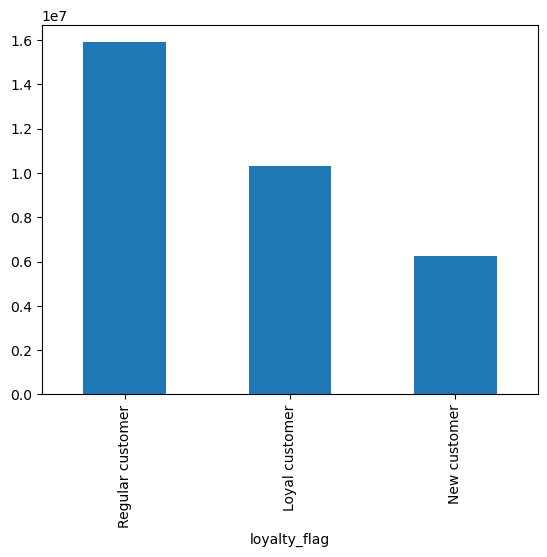

In [8]:
bar = df_merge['loyalty_flag'].value_counts().plot.bar()

# Check whether there's a difference in expenditure depending on the hour of the day

In [10]:
# Create a sample
np.random.seed(4)

In [11]:
# Create a dev list for 70/30
dev = np.random.rand(len(df_merge)) <= 0.7

In [12]:
dev

array([False,  True, False, ..., False,  True,  True])

In [13]:
# Make a split into two samples
big = df_merge[dev]
small = df_merge[~dev]

In [14]:
# check
len(df_merge)

32434212

In [15]:
# Reduce samples to only columns needed
df_2 = small [['order_hour_of_day','prices']]

In [16]:
# Check
df_2.head(5)

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


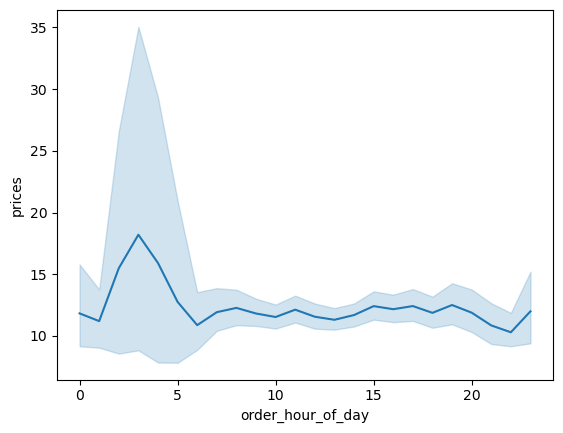

In [17]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [41]:
df_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'average_spending', 'spending_flag', 'order_frequency',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income'],
      dtype='object')

# Explore whether there's a connection between age and spending power (income)

In [45]:
# Reduce to columns needed
df_3 = small [['Age','Number of Dependents']]

In [47]:
# Check 
df_3.head(5)

,Age,Number of Dependents
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


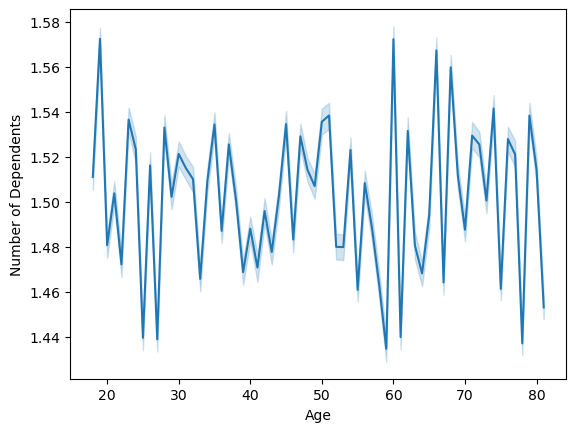

In [49]:
# Create a line chart
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'Number of Dependents')

In [51]:
# There is nothing that shows a clear connection between age and number of dependants.

# Explore whether ther's a connection between age and spending power (income) using a scatterplot

In [56]:
# Check columns
df_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'average_spending', 'spending_flag', 'order_frequency',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income'],
      dtype='object')

In [58]:
# Reduce to columns needed
df_4 = small [['Age','Income']]

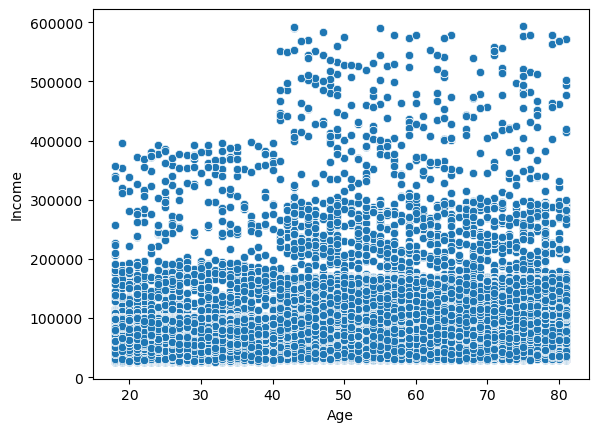

In [60]:
scatter = sns.scatterplot(x='Age', y='Income', data=df_4)

In [62]:
# You can see at age 40, there is a jump in income
# 40 and younger has a steady income to age ratio
# 40 and older has a stead income to age ratio

In [66]:
# Export
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day.png'))
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_spending.png'))